# Thermal conductivity 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/HugoMVale/polykin/main?labpath=docs%2Ftutorials%2Fthermal_conductivity.ipynb)

## Overview

The `polykin.properties.thermal_conductivity` modules provides methods to estimate the thermal conductivity of pure
gases, gas mixtures, and liquid mixtures.

|                     |                     Gas                    |   Liquid   |
|---------------------|:------------------------------------------:|:----------:|
| DIPPR equations     |           `DIPPR100`, `DIPPR102`           | `DIPPR100` |
| Estimation methods  |                      —                     |      —     |
| Mixing rules        |             `KVMX2_wassilijewa`            | `KLMX2_li` |
| Pressure correction | `KVPC_stiel_thodos`, `KVMXPC_stiel_thodos` |      —     |

## Pure gases

The thermal conductivity of gases increases with pressure, but the effect is fairly small at low and moderate pressures.
In the the low pressure domain, which extends from 1 mbar to 10 bar, the effect of pressure is often neglected. For pressures above 10 bar, the effect of pressure on thermal conductivity becomes progressiveley more important and should be considered.

### Temperature correlations at low pressure

The thermal conductivity of low-pressure gases increases with temperature. Experimental data is usually correlated with DIPPR-100 or DIPPR-102. 

In [1]:
from polykin.properties.equations import DIPPR100

In [2]:
# Parameters from Reid, Prausnitz, Pooling (1988)
kV_ethylene  = DIPPR100(-1.760e-2, 1.200e-4, 3.335e-8, -1.366e-11, 
                        Tmin=200, Tmax=1270, symbol='k', unit='W/(m·K)', name='ethylene')
kV_propylene = DIPPR100(-7.584e-3, 6.101e-5, 9.966e-8, -3.840e-11,
                        Tmin=175, Tmax=1270, symbol='k', unit='W/(m·K)', name='propylene')
# kV_ethylene(298.)
# kV_propylene(298.)

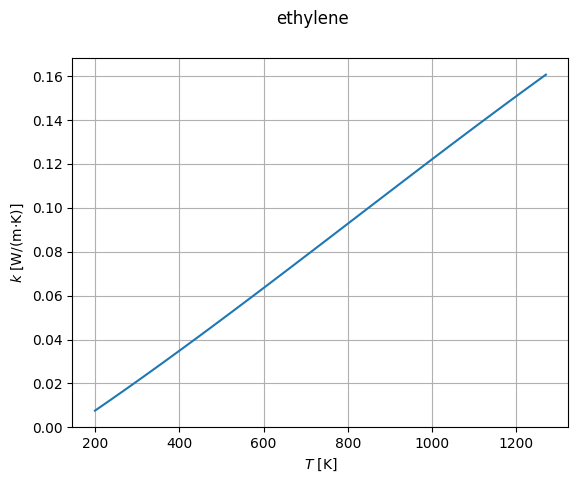

In [3]:
kV_ethylene.plot()

### Pressure correction

The increase of thermal conductivity with respect to the low-pressure value can be estimated with the method of Stiel and Thodos. The primary argument of this method is the molar volume, which can be estimated with an equation of state.

In [4]:
from polykin.properties.thermal_conductivity import KVPC_stiel_thodos

Let us estimate the residual thermal conductivity of ethylene at 350 K and 100 bar.

In [5]:
V = 184e-6 # m³/mol, with Peng-Robinson

KVPC_stiel_thodos(V=V, M=28.05e-3, Tc=282.4, Pc=50.4e5, Zc=0.280)

0.016923428850625477

In this case, the pressure correction is of the same magnitude as the low-pressure value itself. 

## Gas mixtures

### Mixing rules at low pressre

The thermal conductivity of low-pressure gas mixtures can be estimated from the corresponding pure-component values using Wassilijewa's mixing rule.

In [6]:
from polykin.properties.thermal_conductivity import KVMX2_wassilijewa

Let us estimate the thermal conductivity of a 50:50 mol% mixture of ethylene and propylene at 350 K at 1 bar.

In [7]:
import numpy as np

T = 350. # temperature, K

y = np.array([0.5, 0.5]) # mole fractions
M = np.array([28.05e-3, 42.08e-3]) # molar masses, kg/mol

k = np.array([kV_ethylene(T), kV_propylene(T)]) # pure kV

In [8]:
KVMX2_wassilijewa(y, k, M)

0.025935290438256965

### Pressure correction

The increase of thermal conductivity with respect to the low-pressure value can be estimated with the method of Stiel and Thodos. The primary argument of this method is the molar volume, which must be computed with an equation of state.

In [9]:
from polykin.properties.thermal_conductivity import KVMXPC_stiel_thodos

Let us estimate the residual thermal conductivity of a 50 mol% mixture of ethylene and propylene at 350 K and 100 bar.

In [10]:
V = 112e-6  # m³/mol, with Peng-Robinson

y = np.array([0.5, 0.5])
M = np.array([28.05e-3, 42.08e-3]) # kg/mol

Zc = np.array([0.280, 0.274])
Pc = np.array([50.4e5, 46.0e5])    # Pa
Tc = np.array([282.4, 364.9])      # K
w = np.array([0.089, 0.144]) 

KVMXPC_stiel_thodos(V, y, M, Tc, Pc, Zc, w)

0.03818087671826145

## Pure liquids

Most _organic_ liquids have thermal conductivities in the range 0.1-0.2 W/(m·K) at temperatures below the normal boiling point.

#### Temperature correlations

The thermal conductivity decreases with temperature. Experimental data is usually correlated with DIPPR-100. 

In [11]:
from polykin.properties.equations import DIPPR100

In [12]:
# Parameters from Reid, Prausnitz, Pooling (1988)
kL_styrene   = DIPPR100(2.696e-1, -3.384e-4, 1.675e-8, Tmin=243, Tmax=623,
                        symbol='k', unit='W/(m·K)', name='styrene')
kL_butadiene = DIPPR100(3.007e-1, -7.837e-4, 4.916e-7, Tmin=164, Tmax=393,
                        symbol='k', unit='W/(m·K)', name='1,3-butadiene')
# kL_styrene(293)
# kL_butadiene(293)

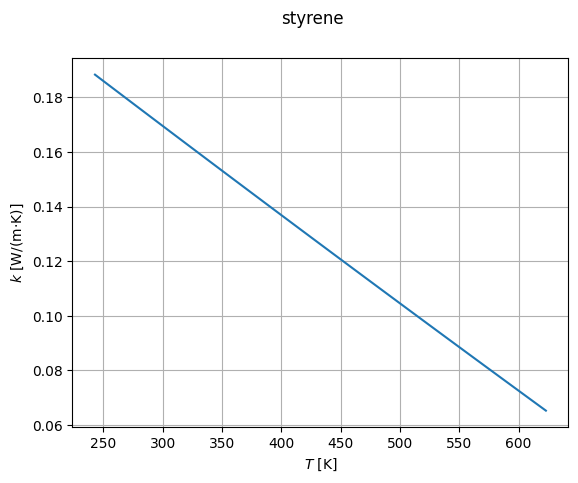

In [13]:
kL_styrene.plot()

## Liquid mixtures

### Mixing rules

The thermal conductivity of liquid mixtures can be estimated from the corresponding pure-component values using Li's mixing rule.

Li's method requires the densities of the components as well, which are usually correlated with DIPPR-100 or DIPPR-105.

In [14]:
from polykin.properties.thermal_conductivity import KLMX2_li
from polykin.properties.equations import DIPPR105

In [15]:
# Parameters from Perry's
dL_styrene   = DIPPR105(0.7397, 0.2603, 636, 0.3009, Tmin=243, Tmax=636,
                        symbol=r'\rho', unit='kmol/m³', name='styrene')
dL_butadiene = DIPPR105(1.2384, 0.2725, 425.17, 0.28813, Tmin=164, Tmax=425,
                        symbol=r'\rho', unit='kmol/m³', name='1,3-butadiene')

# dL_styrene(dL_styrene.Trange)
# dL_butadiene(dL_butadiene.Trange)

Let us estimate de thermal conductivity of a 50:50 wt% mixture of styrene and butadiene at 350 K.

In [16]:
w = np.array([0.5, 0.5]) # mass fractions
T = 350. # temperature, K
k = np.array([kL_styrene(T), kL_butadiene(T)]) # pure kL
rho = np.array([dL_styrene(T)*104.152, dL_butadiene(T)*54.092]) # pure rhoL

In [17]:
KLMX2_li(w, k, rho)

0.10808664126899359